# Symbolic math introduction

Symbolic mathematics is a maturing technology that lets a computer do maths using symbolic manipulation rather than numerical computation.  Python has support for symbolic computation via the "sympy" package.

The sympy documentation can be found at http://docs.sympy.org/latest/index.html.  The PDF version is just under 2000 pages long, which is quite frightening.

Nonetheless, this notebook will introduce some of the basics of symbolic math using Python.  In particular we will see how to define functions of symbolic variables, and differentiate and integrate them symbolically.  

Some other good examples of sympy in use are at http://www.cfm.brown.edu/people/dobrush/am33/SymPy/index.html and https://github.com/sympy/sympy/wiki/Quick-examples.  The first one in particular deals with differential equations, which will be used in subsequent computer assignments.

## Basic differentiation

The cell below imports the symbolic math package, and defines two symbolic variables `x` and `y`.  A symbolic function $f(x,y) = (x^2-2x+3)/y$ is then defined and printed.

In [1]:
import sympy as sp #import the sympy library under the name 'sp'
?sp.integrate()

x, y = sp.symbols('x y');
f = (x**2 - 2*x + 3)/y;
print(f);

Object `sp.integrate()` not found.
(x**2 - 2*x + 3)/y


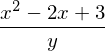

In [2]:
# protip: you can make your outputs look sexy with LaTex:
from IPython.display import display 
sp.init_printing() # initializes pretty printing. Only needs to be run once.

display(f)

Note that `f` here is a symbol representing a function.  It would be nice if the notation made it explicit that it's actually a function of $x$ and $y$, namely `f(x,y)`, but that's not how it works.  However, we can query the free variables:

In [3]:
f.free_symbols

We can get sympy to find a symbolic expression for the partial derivative of $f(x,y)$ with respect to $y$: 

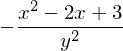

In [4]:
fpy = sp.diff(f, y)
fpy

To evaluate this derivative at some particular values $x=\pi$ and $y=2$ we can substitute into the symbolic expression:

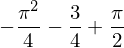

In [5]:
fpyv = fpy.subs([(x, sp.pi), (y, 2)])
fpyv

Notice though that this is still a symbolic expression.  It can be evaluated using the "evalf" method, which finally returns a number:

In [6]:
fpyv.evalf()

## More advanced differentiation

Symbolic expressions can be manipulated.  For example we can define $g(t) = f(x(t), y(t))$, which in this case given above means
$$g(t) = (x(t)^2-2x(t)+3)/y(t),$$
and find its derivative with respect to time.

In [7]:
t = sp.symbols('t');
g = f.subs([(x,x(t)),(y,y(t))]);
gp = sp.diff(g,t);
print(g);
print(gp); 

TypeError: 'Symbol' object is not callable

At this stage the functions $x(t)$ and $y(t)$ are not defined, so the result above expresses the derivative in terms of $dx(t)/dt$ and $dy(t)/dt$ (represented as `Derivative(x(t), t)` and `Derivative(y(t), t)`.  You can see that the chain rule has been applied correctly.  If we know for instance that $x(t) = \sin(t)$ and $y(t) = \cos(2t)$ then we can substitute and evaluate the derivative:

In [8]:
gps = gp.subs([(x(t),sp.sin(t)), (y(t),sp.cos(2*t))]);
gpv = gps.doit();
#you need to run the 'doit' method to get a numerical result, kind of like how you had to use 'evalf' before.
#I don't know precisely how 'evalf' and 'doit' are different, just that if you try 'evalf' instead here, and 'doit'
#previously, you don't get the results you'd want. So if in doubt, try both.
gpv

NameError: name 'gp' is not defined

A symbolic expression can be turned into what is called a lambda function that can be called with numerical values for a single symbolic argument.  For example, the cell below makes `gpv` above into a function and calls it with an array of values for $t$.

In [ ]:
import numpy as np

lam_h = sp.lambdify(t, gpv, modules=['numpy']);
#gpv is an expression in terms of t. 'lambdify' just turns it into a function lam_h(t).

lam_h(np.array((1,2,3)))

## Plotting symbolic functions

The sympy module has a `plot` method that knows how to plot symbolic functions of a single variable.  The function `g` above with $x(t) = \sin(t)$ and $y(t) = \cos(2t)$ is a function of a single time variable `t`, and can be visualised as follows:

In [ ]:
gst = g.subs([(x(t),sp.sin(t)), (y(t),sp.cos(2*t))]);
print(gst);
sp.plot(gst, (t,1,2));

A roughly equivalent plot could be obtained numerically by creating a lambda function for the expression, evaluating it for a closely-spaced set of values of `t` over the required range, and using standard numerical plotting functions that draw straight lines between the calulated points.  If you increase the number of calculated points over the interval then the  approximation in the above graph becomes more accurate.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook

tv = np.linspace(1, 2, 10);
gst_h = sp.lambdify(t, gst, modules=['numpy']);
gstv = gst_h(tv);
plt.plot(tv, gstv);

# lambda functions are also called anonymous functions. You can think of creating one as just another way of defining a function. For example:
# For example: say you had a symbolic expression, f = x^2
# writing my_func = sp.lambdify(x,f);
# is the same as going
# def my_func(x):
#     x^2

The sympy plot function is quite fragile, and might not always work.  Symbolic math packages are amazing, but they're difficult to implement and are sometimes not robust:  you'll find various postings on the internet that give instances of very good symbolic math engines giving a wrong result.  In short, they are useful but you should be careful when using them.

One other nice thing about Jupyter notebooks is that a pretty-print method exists for symbolic expressions.  After the appropriate setup, note the difference in output between the `print` and `display` methods below:

In [ ]:
from IPython.display import display
sp.init_printing()  # pretty printing

print(gst);
display(gst);

## Symbolic integration

Integration is also a standard function in sympy, so we can find for example the integral
$$y(t) = \int_{-10}^t x(\lambda) d\lambda$$
for $x(t) = e^{-t/10} \cos(t)$:

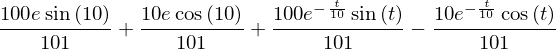

In [9]:
xt = sp.exp(-t/10)*sp.cos(t);  # x(t)
lamb = sp.symbols('lamb');  
xl = xt.subs(t,lamb);  # x(lamb)

yt = sp.integrate(xl, (lamb, -10, t));  # indefinite integral
yt

# to get a definite integral over the range, say -10 to 0, you'd go yt = sp.integrate(xl, (lamb, -10, 0));
# This would give a numeric value.
# NOTE: don't forget about your initial conditions. The definite integral just gives the change in the variable over the
# interval, so you need to add its initial state to this value get the true final state.

## Tasks

These tasks involve writing code, or modifying existing code, to meet the objectives described.

1.  Define the expression $y(t) = v_0 t - \frac{1}{2} g t^2$ for some symbolic values of $v_0$ and $g$ using sympy.  You should recognise this as the "altitude" of a particle moving under the influence of gravity, given that the initial velocity at time $t=0$ is $v_0$.  Make a plot of the particle height in meters for $v_0 = 22.5m/s$ given $g = 9.8 m/s^2$, over the range $t=0$ to $t=5s$.<br><br>

2.  Use symbolic math and the `roots` method to find an expression for the zeros of the expression $y(t)$ above for the same set of conditions.  Substitute to find the nonzero numerical value of $t$ for which your plot in the previous task crosses the x-axis.<br><br>
For help on the `roots` method, type `?sp.roots()` in an empty code cell and run it.  The method takes a symbolic expression as input, and returns a Python dictionary object as the output.  The roots are contained in the tags of the dictionary.  Note that for a d<br><br>

3.  Use symbolic differentiation to find the vertical velocity of the particle in the previous task as a function of time, given the same conditions.  Make a plot of this velocity over the same time range.<br><br>

4.  Suppose the acceleration of a particle is given by $a(t) = 0.2 + \cos(t)$ for positive time.  Use symbolic methods to find and plot the velocity $v(t)$ of the particle over the range $t=0$ to $t=5$ given the initial condition $v(0) = -0.3$.  Then find and plot the position $s(t)$ of the particle over the same time period, given the additional auxiliary condition $s(0) = 0.1$.

In [ ]:
?sp.roots